<a href="https://colab.research.google.com/github/crazat/crazat.githurb.io/blob/main/%EB%B9%84%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 타이타닉 생존자 데이터셋 다운로드 받아 구글드라이브에 올리기
    - 학습세트: https://drive.google.com/file/d/17DUdpAGVIPJ5_Cghku38YG5ugN6-SiNX/view?usp=sharing
    - 평가세트: https://drive.google.com/file/d/1ZhrzzI81mN_rFWXw68eO2a2NQ8vg8IlZ/view?usp=sharing
    - 평가세트 정답: https://drive.google.com/file/d/1kBJwGeAI1y81-gL8AAVVs4ealPHTcNNS/view?usp=sharing

- 구글 드라이브 연결

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- 데이터 경로 변수

In [ ]:
DATA_PATH = "/content/drive/MyDrive/머신러닝/data/"
DATA_PATH

'/content/drive/MyDrive/머신러닝/data/'

- 시드값

In [ ]:
SEED = 42

- 데이터 불러오기

In [ ]:
import pandas as pd
import numpy as np

train = pd.read_csv(f"{DATA_PATH}titanic_train.csv") # 학습데이터
test = pd.read_csv(f"{DATA_PATH}titanic_test.csv") # 테스트 데이터
test_target = pd.read_csv(f"{DATA_PATH}titanic_test_target.csv") # 테스트데이터 정답값
train.shape , test.shape , test_target.shape

((916, 12), (393, 11), (393, 2))

In [ ]:
train.head()

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
1,462,0,3,"Morley, Mr. William",male,34.0,0,0,364506,8.0500,NaN,S
2,1286,0,3,"Kink-Heilmann, Mr. Anton",male,29.0,3,1,315153,22.0250,NaN,S
3,1130,1,2,"Hiltunen, Miss. Marta",female,18.0,1,1,250650,13.0000,NaN,S
4,461,1,1,"Anderson, Mr. Harry",male,48.0,0,0,19952,26.5500,E12,S


- 결측치 확인하기

In [ ]:
train.isnull().sum()

,0
passengerid,0
survived,0
pclass,0
name,0
gender,0
age,180
sibsp,0
parch,0
ticket,0
fare,0


In [ ]:
test.isnull().sum()

,0
passengerid,0
pclass,0
name,0
gender,0
age,83
sibsp,0
parch,0
ticket,0
fare,1
cabin,308


- 학습 데이터에서 얻은 통계량을 이용하여 결측치를 채워야한다.

In [ ]:
age_mean = train["age"].mean() # 평균
fare_median = train["fare"].median() # 중앙값
cabin_unk = "UNK" # 새로운 범주
embarked_mode = train["embarked"].mode()[0] # 최빈값
age_mean , fare_median ,cabin_unk , embarked_mode

(29.904891304347824, 14.5, 'UNK', 'S')

- 학습데이터 결측치 처리

In [ ]:
train["age"] = train["age"].fillna(age_mean)
train["cabin"] = train["cabin"].fillna(cabin_unk)

- 테스트데이터 결측치 처리

In [ ]:
test["age"] = test["age"].fillna(age_mean)
test["fare"] = test["fare"].fillna(fare_median)
test["cabin"] = test["cabin"].fillna(cabin_unk)
test["embarked"] = test["embarked"].fillna(embarked_mode)

In [ ]:
train.isnull().sum().sum() , test.isnull().sum().sum()

(0, 0)

- 특성으로 사용할 변수 추가하기

In [ ]:
cols = ["age","sibsp","parch","fare","pclass","gender","embarked"]
train_ft = train[cols].copy()
test_ft = test[cols].copy() # 테스트 데이터
train_ft.shape, test_ft.shape

((916, 7), (393, 7))

- 범주형 변수 원핫인코딩하여 특성으로 추가하기

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cols = ['gender','embarked']
enc = OneHotEncoder(handle_unknown = 'ignore') # 모르는 범주가 있을 경우 무시
enc.fit(train[cols])

OneHotEncoder(handle_unknown='ignore')

In [ ]:
# 학습 데이터
tmp = pd.DataFrame(
    enc.transform(train_ft[cols]).toarray(), # ndarray
    columns = enc.get_feature_names_out() # 컬럼명
)
train_ft = pd.concat([train_ft,tmp],axis=1)
train_ft.head()

,age,sibsp,parch,fare,pclass,gender,embarked,gender_female,gender_male,embarked_C,embarked_Q,embarked_S
0,71.0,0,0,49.5042,1,male,C,0.0,1.0,1.0,0.0,0.0
1,34.0,0,0,8.0500,3,male,S,0.0,1.0,0.0,0.0,1.0
2,29.0,3,1,22.0250,3,male,S,0.0,1.0,0.0,0.0,1.0
3,18.0,1,1,13.0000,2,female,S,1.0,0.0,0.0,0.0,1.0
4,48.0,0,0,26.5500,1,male,S,0.0,1.0,0.0,0.0,1.0


In [ ]:
# 테스트 데이터
tmp = pd.DataFrame(
    enc.transform(test_ft[cols]).toarray(),
    columns = enc.get_feature_names_out()
)
test_ft = pd.concat([test_ft,tmp],axis=1)
test_ft.head()

,age,sibsp,parch,fare,pclass,gender,embarked,gender_female,gender_male,embarked_C,embarked_Q,embarked_S
0,62.000000,0,0,26.5500,1,male,S,0.0,1.0,0.0,0.0,1.0
1,28.000000,0,0,47.1000,1,male,S,0.0,1.0,0.0,0.0,1.0
2,24.000000,0,0,9.5000,3,male,S,0.0,1.0,0.0,0.0,1.0
3,29.904891,0,0,7.7333,3,female,Q,1.0,0.0,0.0,1.0,0.0
4,18.500000,0,0,7.2833,3,female,Q,1.0,0.0,0.0,1.0,0.0


- 문자열 데이터 제거

In [ ]:
train_ft = train_ft.drop(columns=cols)
test_ft = test_ft.drop(columns=cols)

- Min-Max Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_ft)

MinMaxScaler()

In [ ]:
train_ft[train_ft.columns] = scaler.transform(train_ft) # 학습 데이터
train_ft.head()

,age,sibsp,parch,fare,pclass,gender_female,gender_male,embarked_C,embarked_Q,embarked_S
0,0.887260,0.000,0.000000,0.096626,0.0,0.0,1.0,1.0,0.0,0.0
1,0.423776,0.000,0.000000,0.015713,1.0,0.0,1.0,0.0,0.0,1.0
2,0.361142,0.375,0.111111,0.042990,1.0,0.0,1.0,0.0,0.0,1.0
3,0.223350,0.125,0.111111,0.025374,0.5,1.0,0.0,0.0,0.0,1.0
4,0.599148,0.000,0.000000,0.051822,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
test_ft[test_ft.columns] = scaler.transform(test_ft) # 테스트 데이터
test_ft.head()

,age,sibsp,parch,fare,pclass,gender_female,gender_male,embarked_C,embarked_Q,embarked_S
0,0.774521,0.0,0.0,0.051822,0.0,0.0,1.0,0.0,0.0,1.0
1,0.348616,0.0,0.0,0.091933,0.0,0.0,1.0,0.0,0.0,1.0
2,0.298509,0.0,0.0,0.018543,1.0,0.0,1.0,0.0,0.0,1.0
3,0.372478,0.0,0.0,0.015094,1.0,1.0,0.0,0.0,1.0,0.0
4,0.229613,0.0,0.0,0.014216,1.0,1.0,0.0,0.0,1.0,0.0


- 정답 데이터

In [ ]:
target = train["survived"]
target

,survived
0,0
1,0
2,0
3,1
4,1
...,...
911,1
912,0
913,0
914,0


- 차원축소 실습을 위해 많은 피처 생성하기

In [ ]:
train.nunique()

,0
passengerid,916
survived,2
pclass,3
name,914
gender,2
age,88
sibsp,7
parch,8
ticket,692
fare,246


In [ ]:
cols = ["cabin","ticket"]
enc = OneHotEncoder(handle_unknown="ignore")

# 차원축소하기전의 검증결과와 차원축소 기법들을 적용한 검증결과들을 확인하기위해 별도에 변수에 담기
sparse_features = pd.DataFrame(
    enc.fit_transform(train[cols]).toarray(),
    columns = enc.get_feature_names_out()
)
sparse_features.head()

,cabin_A10,cabin_A11,cabin_A16,cabin_A18,cabin_A23,cabin_A24,cabin_A26,cabin_A29,cabin_A32,cabin_A34,...,ticket_SW/PP 751,ticket_W./C. 14258,ticket_W./C. 14263,ticket_W./C. 14266,ticket_W./C. 6607,ticket_W./C. 6608,ticket_W./C. 6609,ticket_W.E.P. 5734,ticket_W/C 14208,ticket_WE/P 5735
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 동일한 방식으로 테스트 데이터도 별도의 변수에 담기
sparse_test = pd.DataFrame(
    enc.transform(test[cols]).toarray(), # transform만 해야한다.
    columns = enc.get_feature_names_out()
)
sparse_test.head()

,cabin_A10,cabin_A11,cabin_A16,cabin_A18,cabin_A23,cabin_A24,cabin_A26,cabin_A29,cabin_A32,cabin_A34,...,ticket_SW/PP 751,ticket_W./C. 14258,ticket_W./C. 14263,ticket_W./C. 14266,ticket_W./C. 6607,ticket_W./C. 6608,ticket_W./C. 6609,ticket_W.E.P. 5734,ticket_W/C 14208,ticket_WE/P 5735
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
cv = KFold(n_splits=5,shuffle=True, random_state=SEED)

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


- 차원 축소 하기 전의 교차검증 점수

In [ ]:
model = LGBMClassifier(random_state=SEED) # 모델 객체
x_train = pd.concat([train_ft,sparse_features],axis=1) # 추가피처 concat
scores = cross_val_score(model,x_train,target,cv = cv ,scoring='roc_auc',n_jobs = -1)
print(scores) # 폴드별 검증점수 리스트
np.mean(scores) # cv 평균 점수

[0.89799499 0.93001488 0.89003414 0.86835957 0.89789389]


0.896859493098043

# 차원축소(Dimension Reduction)
- 매우 많은 피처로 구성된 데이터를 피처의 차원을 축소해 새로운 데이터를 생성하는 것​
- 차원의 저주를 해결하기 위해 차원 축소기법을 사용

In [ ]:
sparse_features.shape

(916, 838)

## PCA 클래스
- 주성분 분석
- 여러 변수 간에 존재하는 상관관계를 이용해 이를 대표하는 주성분을 추출해 차원을 축소하는 기법​
- 주요 파라미터
    - random_state
        - 시드값
    - n_components
        - 주성분 수


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100,random_state=SEED) # 100개의 피쳐로 축소
pca.fit(sparse_features)

sum(pca.explained_variance_ratio_) # 주성분에 의해 설명되는 분산비율

0.4281209825224699

In [ ]:
tmp = pd.DataFrame(pca.transform(sparse_features)).add_prefix("pca_") # 차원축소하여 데이터프레임 생성
x_train = pd.concat([train_ft,tmp],axis=1) # 추가피처 concat
scores = cross_val_score(model,x_train,target,cv = cv ,scoring='roc_auc',n_jobs = -1)
print(scores) # 폴드별 검증점수 리스트
np.mean(scores) # cv 평균 점수

[0.90344612 0.94396231 0.91084559 0.88465322 0.9038923 ]


0.9093599063371689

- 차원 축소를 할때 얼마나 축소하는게 성능에 좋을까?
    - 원래의 데이터에 분산비율을 잘 설명하는 주성분 순서로 생성된다.
    - 피쳐 개수만큼 주성분을 만들어서 분산비율을 확인해서 축소 개수를 정해보자.

In [ ]:
pca = PCA(n_components=sparse_features.shape[1], random_state=SEED)
pca.fit(sparse_features)
sum(pca.explained_variance_ratio_)

0.9999999999999921

In [ ]:
pca.explained_variance_ratio_.shape

(838,)

In [ ]:
components = np.arange(200,801,50)
for c in components:
    v = sum(pca.explained_variance_ratio_[:c])
    print(f'{c}개 주성분 : {v}')

200개 주성분 : 0.5867269237601559
250개 주성분 : 0.6383326127363379
300개 주성분 : 0.6772240207921235
350개 주성분 : 0.7161154288479091
400개 주성분 : 0.7550068369036947
450개 주성분 : 0.7938982449594804
500개 주성분 : 0.832789653015266
550개 주성분 : 0.8716810610710516
600개 주성분 : 0.9105724691268372
650개 주성분 : 0.9494638771826228
700개 주성분 : 0.9883552852384084
750개 주성분 : 0.9999999999999921
800개 주성분 : 0.9999999999999921


- 80% 이상 설명하는 개수를 선택해서 다시 평가해보기

In [ ]:
pca = PCA(n_components=500, random_state=SEED)
pca.fit(sparse_features)
sum(pca.explained_variance_ratio_)

0.8325067230419987

In [ ]:
tmp = pd.DataFrame(pca.transform(sparse_features)).add_prefix("pca_") # 차원축소하여 데이터프레임 생성
x_train = pd.concat([train_ft,tmp],axis=1) # 추가피처 concat
scores = cross_val_score(model,x_train,target,cv = cv ,scoring='roc_auc',n_jobs = -1)
print(scores) # 폴드별 검증점수 리스트
np.mean(scores) # cv 평균 점수

[0.91071429 0.94222663 0.890625   0.86854402 0.89336177]


0.9010943419638707

- 다른 차원축소 기법과 검증 결과 비교하기 위해 편의상 함수로 만들기
    - decomposition: fit이 완료된 차원축소 객체
    - features: 입력데이터
    - target: 정답값
    - sparse_features: 차원축소 대상 피처
    - seed: 시드값

In [ ]:
def get_score(decomposition,features,target,sparse_features,seed):
    tmp = pd.DataFrame(decomposition.transform(sparse_features)).add_prefix("decomposition_")  # 차원축소하여 데이터프레임 생성
    print(f"sparse_features의 {sparse_features.shape[1]}개의 차원을 {tmp.shape[1]}개의 차원으로 차원축소 완료")
    x_train = pd.concat([features,tmp],axis=1) # 추가피처 concat
    model = LGBMClassifier(random_state=seed) # 모델 객체
    cv = KFold(n_splits=5, shuffle=True, random_state=seed) # cv 객체
    scores = cross_val_score(model,x_train,target,cv = cv ,scoring='roc_auc',n_jobs=-1)  # 교차 검증
    return scores.mean()  # 검증 평균

In [ ]:
pca = PCA(n_components=100, random_state=SEED) # 차원축소 객체
pca.fit(sparse_features) # 차원축소 객체 fit
get_score(pca,train_ft,target,sparse_features,SEED)

sparse_features의 838개의 차원을 100개의 차원으로 차원축소 완료


0.9093599063371689

## KernelPCA 클래스
- 비선형 결합방식
- kernel을 이용하여 비선형으로 결합
- 주요 파라미터
    - random_state
        - 시드값
    - n_components
        - 주성분 수
    - kernel
        - 비선형 결합방식
        - 'linear'(기본값으로 PCA), 'poly', 'rbf', 'sigmoid', 'cosine'

In [ ]:
from sklearn.decomposition import KernelPCA

decomposition = KernelPCA(n_components=100,kernel="rbf",random_state=SEED,n_jobs=-1) # 차원축소 객체
decomposition.fit(sparse_features) # 차원축소 객체 fit
get_score(decomposition,train_ft,target,sparse_features,SEED)

sparse_features의 838개의 차원을 100개의 차원으로 차원축소 완료


0.8970787491766874

## TruncatedSVD 클래스
- 행렬 분해의 종류 중 하나인 특이값 분해에서 특이값 중 상위 K개만 추출하여 차원을 줄인 방식
- 주요 파라미터
    - random_state
        - 시드값
    - n_components
        - 특이값 수


In [ ]:
from sklearn.decomposition import TruncatedSVD
decomposition = TruncatedSVD(n_components=100,random_state=SEED) # 차원축소 객체
decomposition.fit(sparse_features) # 차원축소 객체 fit
get_score(decomposition,train_ft,target,sparse_features,SEED)

sparse_features의 838개의 차원을 100개의 차원으로 차원축소 완료


0.9117600740102059

In [ ]:
sum(decomposition.explained_variance_ratio_) # 분산비율 확인 가능

0.4286817139867007

## GaussianRandomProjection 클래스
- 가우시안 분포의 랜덤한 행렬을 투영해서 데이터 포인트 간에 거리는 유지 되도록하면서 피처의 차원을 저차원으로 축소하는 기법
- 주요 파라미터
    - random_state
        - 시드값
    - n_components
        - 투영 결과의 차원수( 'auto' or int )
        - 기본값은 'auto'
    - eps
        - 입실론 값으로 n_components가 'auto'인 경우만 영향
        - 값이 작을 수록 차원이 높아짐
        - 기본값은 0.1


In [ ]:
from sklearn.random_projection import GaussianRandomProjection
decomposition = GaussianRandomProjection(n_components=100,random_state=SEED)
decomposition.fit(sparse_features)
get_score(decomposition,train_ft,target,sparse_features,SEED)

sparse_features의 838개의 차원을 100개의 차원으로 차원축소 완료


0.9094126309189405

In [ ]:
decomposition = GaussianRandomProjection(n_components='auto',eps=0.5,random_state=SEED)
decomposition.fit(sparse_features)
get_score(decomposition,train_ft,target,sparse_features,SEED)

sparse_features의 838개의 차원을 327개의 차원으로 차원축소 완료


0.9128982216383978

## SparseRandomProjection 클래스
- 희소한 분포의 랜덤한 행렬을 투영해서 데이터 포인트 간에 거리는 유지 되도록하면서 피처의 차원을 저차원으로 축소하는 기법
- 주요 파라미터
    - random_state
        - 시드값
    - n_components
        - 투영 결과의 차원수( 'auto' or int )
        - 기본값은 'auto'
    - eps
        - 입실론 값으로 n_components가 'auto'인 경우만 영향
        - 값이 작을 수록 차원이 높아짐
        - 기본값은 0.1


In [ ]:
from sklearn.random_projection import SparseRandomProjection
decomposition = SparseRandomProjection(n_components='auto', eps=0.5,random_state=SEED)
decomposition.fit(sparse_features)
get_score(decomposition,train_ft,target,sparse_features,SEED)

sparse_features의 838개의 차원을 327개의 차원으로 차원축소 완료


0.901002095803514

- 테스트셋 평가해보기

In [ ]:
# 차원축소 객체
decomposition = GaussianRandomProjection(n_components='auto',eps=0.5,random_state=SEED)
decomposition.fit(sparse_features)

# 학습 데이터
tmp = pd.DataFrame(decomposition.transform(sparse_features)).add_prefix("decomposition_")  # 차원축소하여 데이터프레임 생성
x_train = pd.concat([train_ft,tmp],axis=1)

# 테스트 데이터
tmp = pd.DataFrame(decomposition.transform(sparse_test)).add_prefix("decomposition_")  # 차원축소하여 데이터프레임 생성
x_test = pd.concat([test_ft,tmp],axis=1)

x_train.shape, x_test.shape

((916, 337), (393, 337))

In [ ]:
# 학습및 예측
model = LGBMClassifier(random_state=SEED)
model.fit(x_train,target) # 학습
pred = model.predict_proba(x_test)[:,1] # 예측
pred[:5]

[LightGBM] [Info] Number of positive: 346, number of negative: 570
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008328 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 83483
[LightGBM] [Info] Number of data points in the train set: 916, number of used features: 337
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377729 -> initscore=-0.499198
[LightGBM] [Info] Start training from score -0.499198
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


array([6.39170903e-03, 1.37213336e-03, 7.44698877e-04, 9.96294261e-01,
       9.96787989e-01])

In [ ]:
# 테스트셋 평가
from sklearn.metrics import roc_auc_score
y_test = test_target["survived"] # 테스트셋 y값
roc_auc_score(y_test,pred) # AUC 평가

0.8994070601213457

# 군집분석
- 각 데이터의 유사성을 측정하여 다수의 군집으로 나누고 군집 간의 서로 다른 특성을 확인하는 분석​
- 유사도가 높은 데이터끼리 그룹화

- 손글씨 데이터 받기

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

In [ ]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [ ]:
x = digits.data / 255  # 스케일링
y = digits.target
x.shape, y.shape

((1797, 64), (1797,))

- 데이터 shuffle

In [ ]:
np.random.seed(SEED) # 동일한 결과를 위해 시드 고정
idx = np.arange(x.shape[0]) # 인덱스를 이용해서 shuffle
np.random.shuffle(idx) # 인덱스 shuffle
x = x[idx] # 섞은 인덱스를 반영
y = y[idx] # 정답값도 동일

## KMeans 클래스
- K개의 랜덤한 중심점으로 시작하여 K개의 중심점을 이동하며 가까운 데이터들을 묶는 군집화 기법​
- 초기 중심에 민감하다.
    - 초기중심을 정해야하는 부분이 숙제!!
    - 랜덤하게 지정된 초기중심에 따라 결과가 많이 달라진다
- K-means++
    - 초기 중심점 선정의 어려움을 해결하기 위한 방법
        - 랜덤하게 1개의 데이터샘플을 중심점으로 선택
        - 해당 샘플과 가장 먼 샘플을 2번째 중심점으로 선택
        - 이 과정을 k 개가 될때까지 반복 후 군집화 진행한다.
- 주요 파라미터
    - random_state
        - 시드값
    - n_clusters
        - 군집수(K를 의미)
    - init
        - 초기 중심점 선정방법
        - 'k-means++'(기본값) , 'random'
    - n_init
        - 초기 중심위치 시도 횟수

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10,random_state=SEED,n_init=10)
kmeans.fit(x) # 학습

KMeans(n_clusters=10, n_init=10, random_state=42)

- 각 샘플에 대한 군집번호 확인하기

In [ ]:
kmeans.labels_

array([3, 6, 0, ..., 8, 8, 4], dtype=int32)

- 예측해서 확인하기

In [ ]:
kmeans.predict(x)

array([3, 6, 0, ..., 8, 8, 4], dtype=int32)

## 대표적인 군집화 성능 평가지표
- 군집화가 얼마나 잘되었는지 정량적으로 확인

### 사전에 정의된 그룹이 있는 경우
- 군집화 결과가 얼마나 사전에 정의된 그룹을 설명하는가를 평가
- 예시로 정답클래스가 있는 경우 얼마나 각 클래스처럼 그룹화가 되어 있는가를 평가

- homogeneity_score 함수
    - 각 군집(예측값)이 동일한 클래스(실제값)로 구성되어 있는 정도(동질성)
        - 정밀도와 비슷하다.
        - 0 ~ 1 값이며, 1에 가까울수록 군집화가 잘되었다는 의미

In [ ]:
from sklearn.metrics import homogeneity_score
homogeneity_score(y,kmeans.labels_)

0.7396909456190534

- completeness_score 함수
    - 각 클래스(실제값)에 대하여 동일한 군집(예측값)으로 구성되어 있는 정도(완전성)
        - 재현율과 비슷하다.
        - 0 ~ 1 값이며, 1에 가까울수록 군집화가 잘되었다는 의미

In [ ]:
from sklearn.metrics import completeness_score
completeness_score(y,kmeans.labels_)

0.7483916017730616

- v_measure_score 함수
    - homogeneity 와 completeness의 조화평균
        - 0 ~ 1 값이며, 1에 가까울수록 군집화가 잘되었다는 의미

In [ ]:
from sklearn.metrics import v_measure_score
v_measure_score(y,kmeans.labels_)

0.7440158378028527

### 사전에 정의된 그룹이 없는 경우
- 대표적으로 실루엣 계수(silhouette coefficient)가 있다.
    - 군집 내의 거리는 짧을수록 군집 간의 거리가 길수록 좋은 군집화라는 가정을 평가하기 위한 지표
    - -1 ~ 1 의 값을 가진다.
    - 1에 가까울수록 최상의 군집화 되었다는 것을 의미
    - 0 에 가까울수록 군집간의 거리가 가까워지고 겹친다는 것을 의미
    - 음수일경우 잘못된 방식으로 군집화 되었다는 의미

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(x,kmeans.labels_) # 첫번째인수에 x 값을 넣어야함

0.18247516649447781

- 군집분석 기법별로 평가 결과를 출력하기 위해 편의상 함수로 만들기

In [ ]:
def print_score(x,y,pred):
    print(f"homogeneity: {homogeneity_score(y,pred)}")
    print(f"completeness: {completeness_score(y,pred)}")
    print(f"v_measure: {v_measure_score(y,pred)}")
    print(f"silhouette: {silhouette_score(x,pred)}")

## MiniBatchKMeans 클래스
- Mini-Batch 개수 만큼 무작위로 분리하여 K-means 군집화를 한다.
- 결과가 완전 똑같지는 않지만 k-means 와 비슷하게 나온다.
- 속도가 미니배치 방식이 빠르다.

In [ ]:
x.shape

(1797, 64)

In [ ]:
from sklearn.cluster import MiniBatchKMeans
cluster = MiniBatchKMeans(n_clusters=10,random_state=SEED,batch_size = 128,n_init=10) # batch_size 에 배치 크기를 넣으면 된다.
cluster.fit(x)

MiniBatchKMeans(batch_size=128, n_clusters=10, n_init=10, random_state=42)

In [ ]:
print_score(x,y,cluster.labels_)

homogeneity: 0.6446940703444946
completeness: 0.657992265789054
v_measure: 0.6512752921717194
silhouette: 0.15122814227568743


## MeanShift 클래스
- k-means 와 유사하게 중심을 이동하면서 군집화하지만 다른 점은 평균 거리가 아니라 데이터의 밀도가 가장 높은 지점을 중심점으로 하여 이동한다.
    - 개별 데이터의 특정 반경 내에서 가장 밀도가 높은 방향으로 데이터를 이동
    - 업데이트된 위치에서 다시 반경 내에서 가장 밀도가 높은 방향으로 데이터를 이동
    - 데이터의 위치가 업데이트 되지 않을 때 까지 반복
    - 이 과정을 모든 개별 데이터에 적용하여 개별 데이터들이 모인 중심점을 군집 중심점으로 설정
- 이상치의 영향력이 크지 않고, 미리 군집 개수를 정할 필요가 없지만 지정한 반경에 따라 군집결과의 품질이 많이 달라지고 수행시간이 오래걸린다.


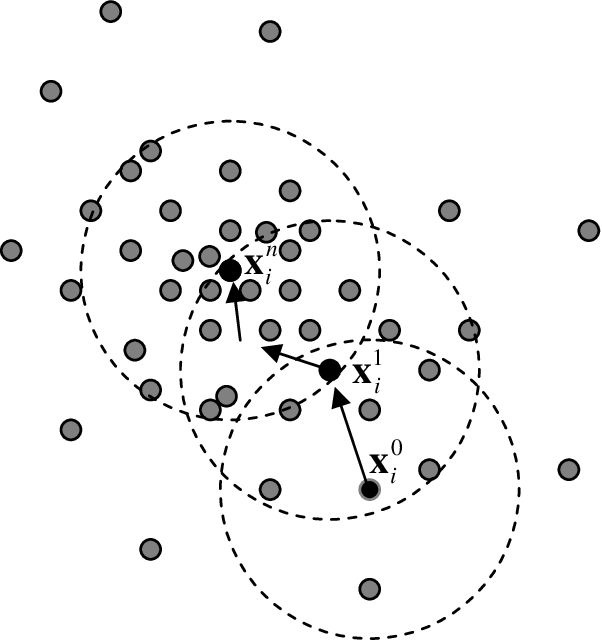

- 주요 파라미터
    - bandwidth
        - None or Float
        - None 일경우 자동으로 반경 추정
    - cluster_all
        - 모든 샘플 군집 부여 여부
        - True 일경우 모든 샘플에 강제로 군집 부여해서 반경 밖에 샘플들도 가까운 군집에 묶는다.
        - False 일 경우 반경 밖에 샘플들은 -1 을 부여함

In [ ]:
from sklearn.cluster import MeanShift

cluster = MeanShift(bandwidth= 0.1,cluster_all=False,n_jobs=-1)
cluster.fit(x)

MeanShift(bandwidth=0.1, cluster_all=False, n_jobs=-1)

In [ ]:
np.unique(cluster.labels_) # 군집번호

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44])

In [ ]:
print_score(x,y,cluster.labels_)

homogeneity: 0.6046179698329038
completeness: 0.5924525346001065
v_measure: 0.598473435550797
silhouette: 0.0008253454943234628


## DBSCAN 클래스
- 밀도 기반 군집화의 대표적인 알고리즘으로 데이터 밀도 차이를 기반으로 하고 있어 복잡한 기하학적 분포도를 가진 데이터에 대해서도 군집화를 잘 수행하는 기법
- 주요 파라미터
    - eps
        - 이웃으로 판단하는 최대 거리(반경)
    - min_samples
        - 이웃 반경 내 최소 샘플 수

In [ ]:
from sklearn.cluster import DBSCAN
cluster = DBSCAN(eps = 0.05, min_samples = 5 ,n_jobs=-1)
cluster.fit(x)

DBSCAN(eps=0.05, n_jobs=-1)

In [ ]:
np.unique(cluster.labels_)

array([-1,  0,  1,  2,  3])

In [ ]:
print_score(x,y,cluster.labels_) # 실루엣 계수는 적절한 평가지표가 되지 못함

homogeneity: 0.024436562879944914
completeness: 0.3960788839351282
v_measure: 0.046033060740123255
silhouette: -0.17191196787954596


## AgglomerativeClustering 클래스
- 가까운 군집들을 연결해 나가면서 계층적으로 군집화 하는 기법
- 모든 데이터에 대해서 각각의 독립적인 군집화를 하고 가까운 군집들을 병합하면서 군집 개수를 줄여 나간다.
- 주요 파라미터
    - n_clusters
        - 군집수
    - linkage
        - 연결 기준
        - 'ward': 병합되는 군집의 분산이 최소화하도록 연결
        - 'average': 군집간의 모든 관측치 사이의 평균 거리를 사용
        - 'complete': 군집간의 모든 관측치 사이의 최대 거리를 사용
        - 'single': 군집간의 모든 관측치 사이의 최소 거리를 사용

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=10,linkage='ward')
cluster.fit(x)

AgglomerativeClustering(n_clusters=10)

In [ ]:
print_score(x,y,cluster.labels_)

homogeneity: 0.8575128719504722
completeness: 0.8790955851724198
v_measure: 0.8681701126909083
silhouette: 0.17849659940596496


# 타이타닉데이터 군집화해서 군집별로 분석해보기

- 실루엣 계수가 높은 k 값을 선택

In [ ]:
for k in range(3,10):
    cluster = KMeans(n_clusters=k,random_state=SEED,n_init=10) # k-means
    cluster.fit(train_ft) # 학습
    score = silhouette_score(train_ft,cluster.labels_) # 실루엣 계수
    print(k,score) # 출력

3 0.5031456535245477
4 0.5576293295795347
5 0.6142298348895643
6 0.5767132918709521
7 0.6131242122254625
8 0.5900748401860111
9 0.6033669158189231


- 군집분석

In [ ]:
cluster = KMeans(n_clusters=5,random_state=SEED,n_init=10)
cluster.fit(train_ft)

KMeans(n_clusters=5, n_init=10, random_state=42)

- 군집별로 EDA를 위해 데이터 프레임생성

In [ ]:
cols = ["survived","pclass","gender","age","sibsp","parch","fare","embarked"]
df = train[cols].copy() # 원본 데이터 복사
df["cluster"] = cluster.labels_ # 군집번호
df

,survived,pclass,gender,age,sibsp,parch,fare,embarked,cluster
0,0,1,male,71.000000,0,0,49.5042,C,2
1,0,3,male,34.000000,0,0,8.0500,S,1
2,0,3,male,29.000000,3,1,22.0250,S,1
3,1,2,female,18.000000,1,1,13.0000,S,0
4,1,1,male,48.000000,0,0,26.5500,S,1
...,...,...,...,...,...,...,...,...,...
911,1,1,male,35.000000,0,0,512.3292,C,2
912,0,3,male,29.904891,0,0,24.1500,Q,4
913,0,3,male,36.000000,0,0,7.4958,S,1
914,0,3,male,38.000000,0,0,7.8958,S,1


- 각 군집 비율

In [ ]:
df["cluster"].value_counts(normalize=True)

,proportion
cluster,
1,0.468341
0,0.236900
2,0.115721
4,0.091703
3,0.087336


- 군집별 생존률

In [ ]:
df.groupby("cluster")["survived"].agg("mean")

,survived
cluster,
0,0.792627
1,0.128205
2,0.141509
3,0.887500
4,0.392857


- 군집별로 통계량 확인하기

In [ ]:
for c in range(5):
    print(f"{c}번 군집")
    mask = df["cluster"] == c # 마스킹
    display(df.loc[mask].describe()) # display
    print()

0번 군집


,survived,pclass,age,sibsp,parch,fare,cluster
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.0
mean,0.792627,2.175115,28.587477,0.769585,0.737327,38.004436,0.0
std,0.406363,0.808936,13.761918,1.266519,1.122224,45.054903,0.0
min,0.000000,1.000000,0.170000,0.000000,0.000000,7.000000,0.0
25%,1.000000,1.000000,21.000000,0.000000,0.000000,12.650000,0.0
50%,1.000000,2.000000,29.000000,0.000000,0.000000,23.450000,0.0
75%,1.000000,3.000000,35.000000,1.000000,1.000000,39.400000,0.0
max,1.000000,3.000000,76.000000,8.000000,9.000000,263.000000,0.0



1번 군집


,survived,pclass,age,sibsp,parch,fare,cluster
count,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.0
mean,0.128205,2.407925,29.891206,0.426573,0.254079,22.329543,1.0
std,0.334708,0.766734,12.245556,1.064439,0.816457,27.102453,0.0
min,0.000000,1.000000,0.670000,0.000000,0.000000,0.000000,1.0
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,1.0
50%,0.000000,3.000000,29.904891,0.000000,0.000000,10.500000,1.0
75%,0.000000,3.000000,36.000000,1.000000,0.000000,26.000000,1.0
max,1.000000,3.000000,80.000000,8.000000,9.000000,221.779200,1.0



2번 군집


,survived,pclass,age,sibsp,parch,fare,cluster
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.0
mean,0.141509,2.000000,32.237233,0.283019,0.198113,53.820443,2.0
std,0.350202,0.956183,12.311326,0.492897,0.524083,88.004931,0.0
min,0.000000,1.000000,6.000000,0.000000,0.000000,4.012500,2.0
25%,0.000000,1.000000,26.000000,0.000000,0.000000,7.229200,2.0
50%,0.000000,2.000000,29.904891,0.000000,0.000000,22.018750,2.0
75%,0.000000,3.000000,34.875000,1.000000,0.000000,57.172925,2.0
max,1.000000,3.000000,71.000000,2.000000,3.000000,512.329200,2.0



3번 군집


,survived,pclass,age,sibsp,parch,fare,cluster
count,80.000000,80.000000,80.000000,80.000000,80.00000,80.000000,80.0
mean,0.887500,1.600000,30.932303,0.487500,0.50000,88.350941,3.0
std,0.317974,0.880161,15.244148,0.573547,0.72914,99.063707,0.0
min,0.000000,1.000000,0.750000,0.000000,0.00000,7.225000,3.0
25%,1.000000,1.000000,22.000000,0.000000,0.00000,18.379150,3.0
50%,1.000000,1.000000,29.904891,0.000000,0.00000,58.689600,3.0
75%,1.000000,3.000000,44.250000,1.000000,1.00000,108.900000,3.0
max,1.000000,3.000000,60.000000,2.000000,3.00000,512.329200,3.0



4번 군집


,survived,pclass,age,sibsp,parch,fare,cluster
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.0
mean,0.392857,2.952381,29.456425,0.404762,0.166667,11.160073,4.0
std,0.491319,0.214238,10.387448,1.007431,0.636885,6.592466,0.0
min,0.000000,2.000000,2.000000,0.000000,0.000000,6.750000,4.0
25%,0.000000,3.000000,29.904891,0.000000,0.000000,7.750000,4.0
50%,0.000000,3.000000,29.904891,0.000000,0.000000,7.750000,4.0
75%,1.000000,3.000000,29.904891,0.000000,0.000000,12.350000,4.0
max,1.000000,3.000000,70.500000,4.000000,5.000000,29.125000,4.0


- 군집별 상관계수 확인하기

In [ ]:
cols = ["age","sibsp","parch","fare","pclass","survived"] # 수치형 변수들과 타겟
for c in range(5):
    print(f"{c} 군집")
    mask = df["cluster"] == c # 마스킹
    display(df.loc[mask,cols].corr()) # display
    print()

0 군집


,age,sibsp,parch,fare,pclass,survived
age,1.000000,-0.084879,-0.093153,0.201433,-0.335271,0.076247
sibsp,-0.084879,1.000000,0.240603,0.093921,0.170610,-0.228201
parch,-0.093153,0.240603,1.000000,0.092784,0.163099,-0.180912
fare,0.201433,0.093921,0.092784,1.000000,-0.614587,0.163247
pclass,-0.335271,0.170610,0.163099,-0.614587,1.000000,-0.438284
survived,0.076247,-0.228201,-0.180912,0.163247,-0.438284,1.000000



1 군집


,age,sibsp,parch,fare,pclass,survived
age,1.000000,-0.181038,-0.151559,0.133375,-0.335787,-0.051505
sibsp,-0.181038,1.000000,0.404621,0.314673,0.066845,-0.029259
parch,-0.151559,0.404621,1.000000,0.289061,0.061718,0.051518
fare,0.133375,0.314673,0.289061,1.000000,-0.509109,0.145894
pclass,-0.335787,0.066845,0.061718,-0.509109,1.000000,-0.204262
survived,-0.051505,-0.029259,0.051518,0.145894,-0.204262,1.000000



2 군집


,age,sibsp,parch,fare,pclass,survived
age,1.000000,-0.056944,-0.037156,0.166650,-0.474918,-0.052670
sibsp,-0.056944,1.000000,0.370771,0.169699,-0.040415,-0.013533
parch,-0.037156,0.370771,1.000000,0.359557,-0.133036,0.001469
fare,0.166650,0.169699,0.359557,1.000000,-0.520607,0.196673
pclass,-0.474918,-0.040415,-0.133036,-0.520607,1.000000,-0.028441
survived,-0.052670,-0.013533,0.001469,0.196673,-0.028441,1.000000



3 군집


,age,sibsp,parch,fare,pclass,survived
age,1.000000,-0.276011,-0.280986,0.331922,-0.530395,0.091860
sibsp,-0.276011,1.000000,0.166478,-0.073610,0.165495,0.026896
parch,-0.280986,0.166478,1.000000,0.017258,0.256415,-0.027299
fare,0.331922,-0.073610,0.017258,1.000000,-0.504914,0.260891
pclass,-0.530395,0.165495,0.256415,-0.504914,1.000000,-0.479429
survived,0.091860,0.026896,-0.027299,0.260891,-0.479429,1.000000



4 군집


,age,sibsp,parch,fare,pclass,survived
age,1.000000,-0.514250,-0.099400,-0.319023,-0.352338,-0.113456
sibsp,-0.514250,1.000000,0.306705,0.821524,0.090380,-0.130400
parch,-0.099400,0.306705,1.000000,0.520848,0.058867,-0.211768
fare,-0.319023,0.821524,0.520848,1.000000,-0.026598,-0.127582
pclass,-0.352338,0.090380,0.058867,-0.026598,1.000000,0.179869
survived,-0.113456,-0.130400,-0.211768,-0.127582,0.179869,1.000000


## Plotly 라이브러리를 이용한 시각화
- Interactive 한 그래프 생성
- https://plotly.com/python/getting-started/#jupyter-notebook-support

In [ ]:
import plotly.express as px

In [ ]:
mask = df["cluster"].isin([1,3])
cluster_1n3 = df.loc[mask].reset_index(drop=True)
cluster_1n3.head()

,survived,pclass,gender,age,sibsp,parch,fare,embarked,cluster
0,0,3,male,34.0,0,0,8.0500,S,1
1,0,3,male,29.0,3,1,22.0250,S,1
2,1,1,male,48.0,0,0,26.5500,S,1
3,0,3,male,17.0,0,0,7.8958,S,1
4,0,3,male,45.0,0,0,6.9750,S,1


In [ ]:
cluster_1n3["survived"].mean()

0.2475442043222004

In [ ]:
cluster_1n3["gender"].value_counts(normalize=True)

,proportion
gender,
male,0.842829
female,0.157171


### Heatmap

In [ ]:
px.imshow(cluster_1n3.corr(numeric_only=True),width=600,height=600,text_auto=True)

### Box plot

In [ ]:
px.box(cluster_1n3,x="survived",y="fare")

### Violin plot

In [ ]:
px.violin(cluster_1n3,x="survived",y="fare", box=True)

### histogram

In [ ]:
px.histogram(cluster_1n3,x="age",text_auto=True) # text_auto=True(그래프에 수치 표시)

- y 축에 다른 컬럼의 통계치를 볼수 있다.
    - histfunc 파라미터
        - 'sum', 'count', 'avg'

In [ ]:
px.histogram(cluster_1n3,x="age",y="survived",text_auto=True,histfunc="avg")

### scatter

In [ ]:
px.scatter(cluster_1n3,x="fare",y="age")

- 좌표상의 점에 특징도 볼수 있다.
    - size 파라미터
        - 좌표상의 점크기에 해당 컬럼값의 크기가 반영된다.
    - color 파라미터
        - 범주형 컬럼명을 주면 되고 해당 범주값이 color 로 반영된다.

In [ ]:
px.scatter(cluster_1n3,x="fare",y="age",size="parch",color = "survived")

# 군집분석 응용해보기
- LGBMClassifier 모델학습후 f1 점수 확인

In [ ]:
# 학습및 예측
model = LGBMClassifier(random_state=SEED)
model.fit(train_ft,target)
pred = model.predict(test_ft)
pred[:5]

[LightGBM] [Info] Number of positive: 346, number of negative: 570
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 238
[LightGBM] [Info] Number of data points in the train set: 916, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377729 -> initscore=-0.499198
[LightGBM] [Info] Start training from score -0.499198


array([0, 0, 0, 1, 1])

In [ ]:
# 테스트 데이터 평가 결과
from sklearn.metrics import f1_score
y_test = test_target["survived"] # 테스트셋 y값
f1_score(y_test,pred) # f1 평가

0.7636363636363637

- KMeans 이용해서 군집화 해서 F1 점수 확인해보기

In [ ]:
cluster = KMeans(n_clusters=2,random_state=SEED,n_init=10) # 2개 군집으로 군집화
cluster.fit(train_ft) # 학습
pred = cluster.predict(test_ft) # 테스트셋 군집화
pred[:5]

array([0, 0, 0, 1, 1], dtype=int32)

In [ ]:
# 군집번호 1에 대한 비율을 확인한다.
pred.mean()

0.33078880407124683

In [ ]:
# 군집번호 1에 대한 비율이 더 높을 경우 다음의 코드를 실행할것
# pred = np.where(pred,0,1) # 0 과 1을 서로 바꾸기

In [ ]:
# 테스트 데이터 평가 결과
y_test = test_target["survived"] # 테스트셋 y값
f1_score(y_test,pred) # f1 평가

0.7913669064748201